In [1]:
import maup
import geopandas
import matplotlib.pyplot as plt

In [2]:
ut = geopandas.read_file("https://github.com/mggg-states/UT-shapefiles/raw/master/UT_precincts.zip")

In [2]:
example = geopandas.read_file("zip://examples/overlaps.zip")

In [6]:
resolved = maup.resolve_overlaps(example)

0     POLYGON ((561392.5700000003 4451601.289999999,...
1     POLYGON ((552000.1299999999 4446334.859999999,...
2     POLYGON ((542353.8700000001 4460858.49, 542538...
3     POLYGON ((585361.9800000004 4261340.439999999,...
4     POLYGON ((587086.2999999998 4450512.1, 587105....
4     POLYGON ((587086.2999999998 4450512.1, 587105....
5     POLYGON ((484709.9699999997 4256279.619999999,...
5     POLYGON ((484709.9699999997 4256279.619999999,...
6     POLYGON ((437431.4199999999 4320667.220000001,...
6     POLYGON ((437431.4199999999 4320667.220000001,...
7     POLYGON ((423552.1600000001 4261906.67, 423332...
7     POLYGON ((423552.1600000001 4261906.67, 423332...
8     (POLYGON ((585949.3300000001 4369336.890000001...
8     (POLYGON ((585949.3300000001 4369336.890000001...
9     POLYGON ((501365.5499999998 4346591.32, 501391...
10    POLYGON ((490905.6500000004 4330804.23, 490827...
11    POLYGON ((514340.6500000004 4358696.77, 514281...
12    POLYGON ((523993.4199999999 4368881.550000

(402483.02050000004, 658125.2095000003, 4210513.492000001, 4478232.768000001)

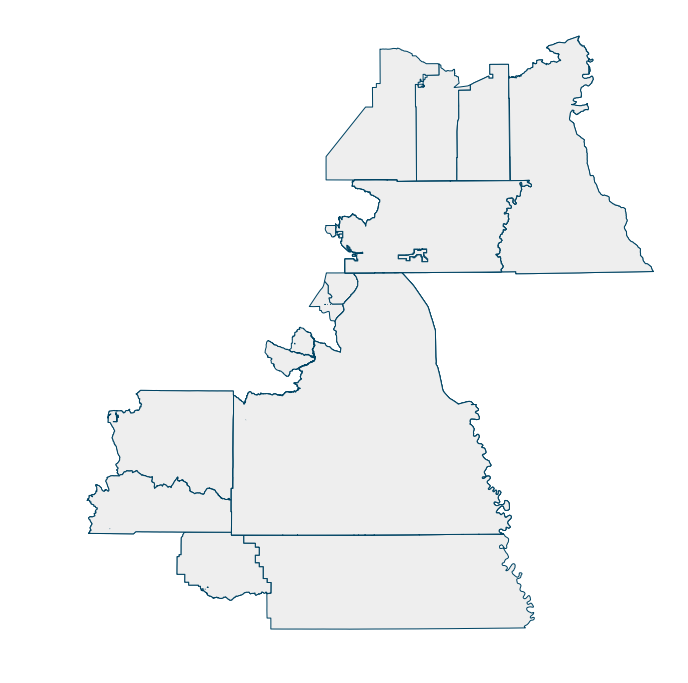

In [17]:
resolved.plot(figsize=(12, 12), edgecolor="#004464", color="#eeeeee")
plt.axis('off')

C:\dev\maup\maup\adjacencies.py:52: OverlapWarning: Found overlapping polygons while computing adjacencies.
This could be evidence of topological problems.
Indices of overlaps: {(6, 7), (3, 13), (4, 8), (4, 18), (2, 18), (5, 7), (0, 18), (5, 13), (13, 18), (8, 18), (6, 13)}
  OverlapWarning,


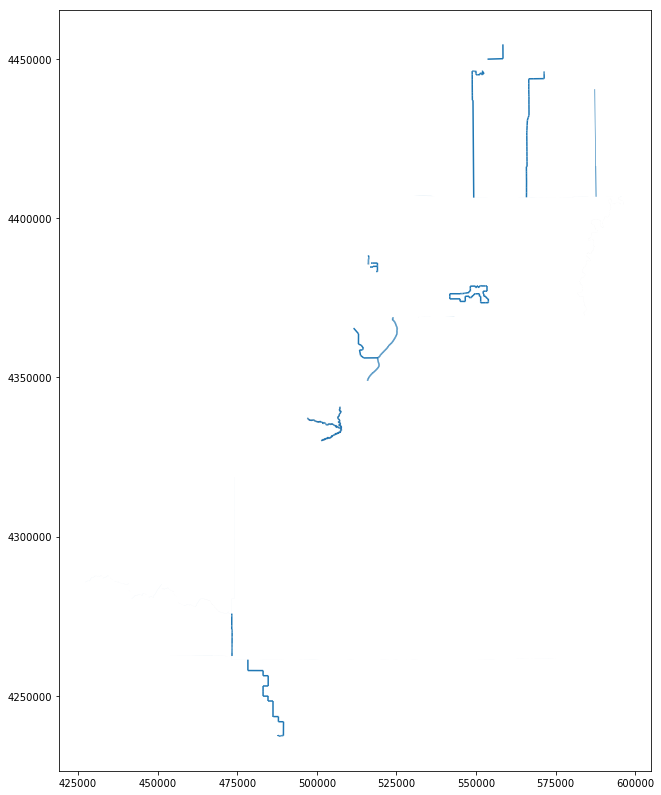

In [44]:
maup.adjacencies(example).plot(figsize=(14, 14))

In [47]:
inters = maup.intersections(example, example, area_cutoff=None)

In [50]:
non_self_inters = [i != j for i, j in inters.index]
inters = inters[non_self_inters]

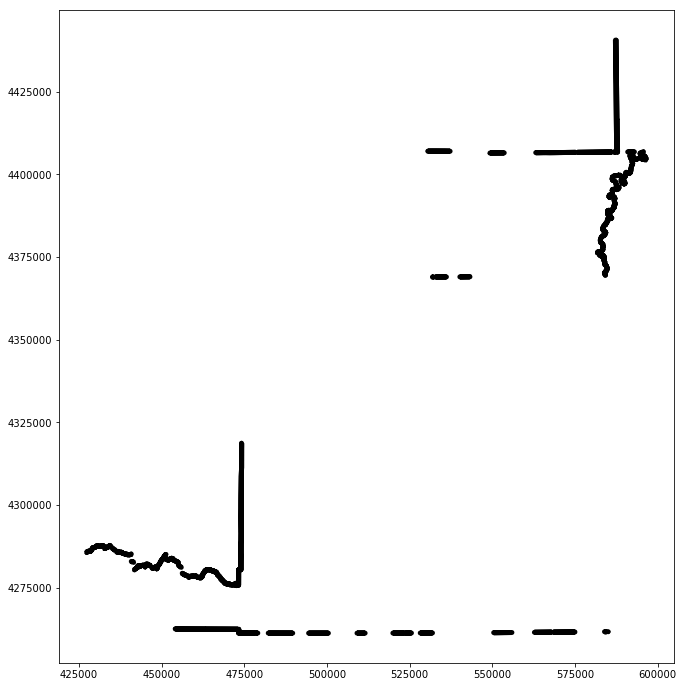

In [55]:
inters[inters.area > 0].plot(figsize=(12, 12), linewidth=5, edgecolor="black")

(587180.8423281712, 587877.9477320978, 4405060.284856401, 4442262.112516327)

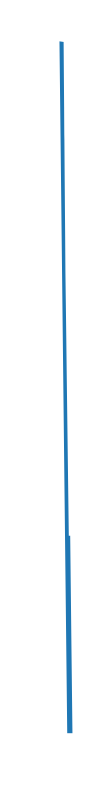

In [64]:
inters.loc[[inters.area.idxmax()]].plot(figsize=(14,14))
plt.axis('off')

In [65]:
polygon = inters[inters.area.idxmax()]

In [80]:
from shapely.ops import triangulate

triangles = triangulate(polygon, edges=False)

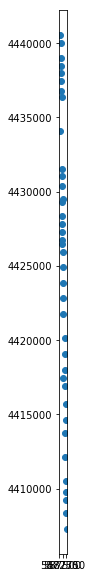

In [81]:
triangles_geo = geopandas.GeoSeries(triangles)

triangles_geo.centroid.scale(xfact=100).plot(figsize=(10, 10))

In [87]:
from shapely.geometry import LineString
from shapely import affinity

In [132]:
import numpy as np
from scipy.spatial import distance_matrix

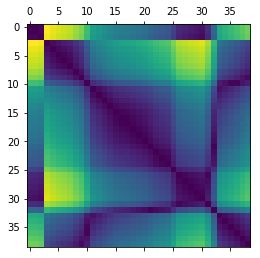

In [137]:
plt.matshow(distance_matrix(points, points))

In [113]:
dist = distance_matrix(points, points)

In [145]:
max_indices = np.argmax(dist, axis=1)

In [83]:
line = LineString(triangles_geo.centroid)

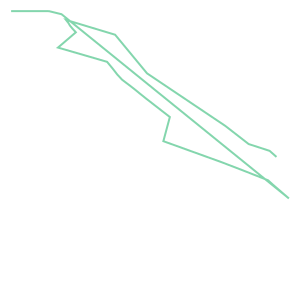

In [88]:
affinity.scale(line, xfact=100)

(402483.02050000004, 658125.2095000003, 4210513.492000001, 4478232.768000001)

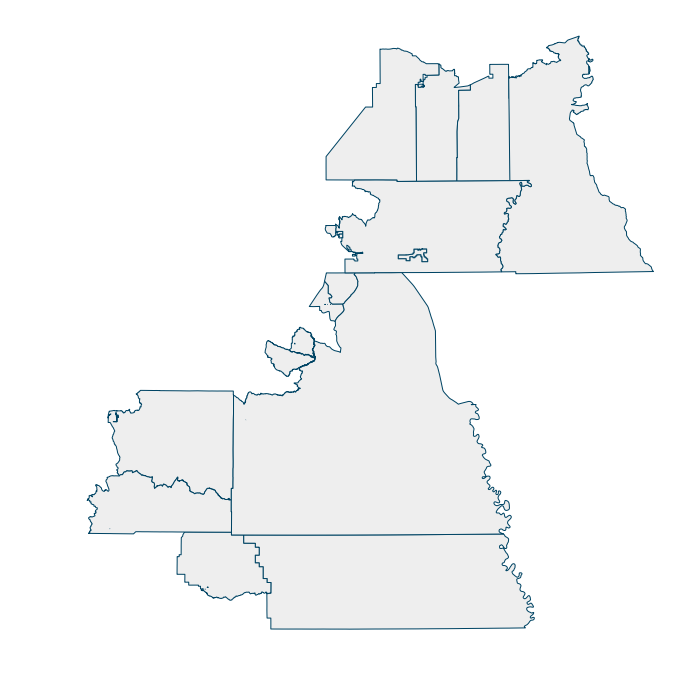

In [18]:
example.plot(figsize=(12, 12), edgecolor="#004464", color="#eeeeee")
plt.axis('off')

In [39]:
resolved

0     POLYGON ((561392.5700000003 4451601.289999999,...
1     POLYGON ((552000.1299999999 4446334.859999999,...
2     POLYGON ((542353.8700000001 4460858.49, 542538...
3     POLYGON ((585361.9800000004 4261340.439999999,...
4     POLYGON ((587086.2999999998 4450512.1, 587105....
4     POLYGON ((587086.2999999998 4450512.1, 587105....
5     POLYGON ((484709.9699999997 4256279.619999999,...
5     POLYGON ((484709.9699999997 4256279.619999999,...
6     POLYGON ((437431.4199999999 4320667.220000001,...
6     POLYGON ((437431.4199999999 4320667.220000001,...
7     POLYGON ((423552.1600000001 4261906.67, 423332...
7     POLYGON ((423552.1600000001 4261906.67, 423332...
8     (POLYGON ((585949.3300000001 4369336.890000001...
8     (POLYGON ((585949.3300000001 4369336.890000001...
9     POLYGON ((501365.5499999998 4346591.32, 501391...
10    POLYGON ((490905.6500000004 4330804.23, 490827...
11    POLYGON ((514340.6500000004 4358696.77, 514281...
12    POLYGON ((523993.4199999999 4368881.550000

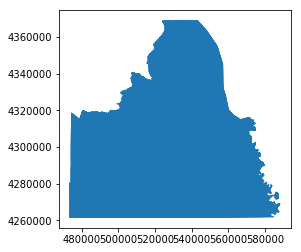

In [41]:
resolved.loc[13].plot()